In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# df.fillna(method = 'ffill')

In [2]:
# NaN 데이터를 처리 -> fillna(method = 'ffill') : '전출지별' 데이터의 NaN을 이전 자료로 대체
# 전출지별이 서울특별시인 자료만 추출
# 전출지별 컬럼을 삭제
# 전입지별 컬럼명을 전입지로 수정
# 전입지 컬럼을 인덱스로 설정

# fillna(method = 'ffill')

In [3]:
df = pd.read_excel('../dataset/시도별 전출입 인구수.xlsx')

print(df.head())          # NaN 값이 있음(전국 아래), 이전 자료의 값으로 대체

df_1 = df.fillna(method = 'ffill')      # NaN 값이 나오면 이전의 값으로 채워라
df_1.head()

   전출지별   전입지별      1970      1971      1972      1973      1974      1975  \
0  전출지별   전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1    전국     전국   4046536   4210164   3687938   4860418   5297969   9011440   
2   NaN  서울특별시   1742813   1671705   1349333   1831858   2050392   3396662   
3   NaN  부산광역시    448577    389797    362202    482061    680984    805979   
4   NaN  대구광역시         -         -         -         -         -         -   

       1976      1977  ...      2008      2009      2010      2011      2012  \
0  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1   6773250   7397623  ...   8808256   8487275   8226594   8127195   7506691   
2   2756510   2893403  ...   2025358   1873188   1733015   1721748   1555281   
3    724664    785117  ...    514502    519310    519334    508043    461042   
4         -         -  ...    409938    398626    370817    370563    348642   

       2013      2014      2015      2016      201

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


# mask = ((df_1['전출지별'] == '서울특별시') & (df_1['전입지별'] != '서울특별시'))

In [4]:
# 전출지별이 '서울특별시'인 자료만 검색

mask = ((df_1['전출지별'] == '서울특별시') & (df_1['전입지별'] != '서울특별시'))
                   # df(파일)['(파일 속 정보)'] == '(파일 속 정보의 한 가지)'
                   # import 로 사용하는 것들은 'and' 대신에 '&'
mask               

0      False
1      False
2      False
3      False
4      False
       ...  
320    False
321    False
322    False
323    False
324    False
Length: 325, dtype: bool

In [5]:
df_seoul = df_1[mask].copy()    # df(파일)[내가 뽑고 싶은 내용]
                                # copy()를 사용하지 않으면 원본 훼손
df_seoul.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


# drop(colunms = ' ', axis = 0, 1, inplace =True)

In [6]:
# 전출지별 컬럼 삭제

df_seoul.drop(columns = '전출지별', axis = 1, inplace = True)

# 전입지별 -> 전입지로 변경

df_seoul.rename(columns = {'전입지별' : '전입지'}, inplace = True)

df_seoul.head()

,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


# set_index(' ', inplace = True)

In [7]:
# 전입지 컬럼을 인덱스로 설정

df_seoul.set_index('전입지', inplace = True)
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


# 자료를 가져올 때 loc

In [8]:
# 경기도로 전입한 인구수의 변화도를 그래프로 표현

sr_one = df_seoul.loc['경기도'].copy()     # 서울 데이터의 인덱스 중 '경기도'만
sr_one

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
1990    473889
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
1996    520566
1997    495454
1998    407050
1999    471841
2000    435573
2001    499575
2002    516765
2003    457656
2004    400206
2005    414621
2006    449632
2007    431637
2008    412408
2009    398282
2010    410735
2011    373771
2012    354135
2013    340801
2014    332785
2015    359337
2016    370760
2017    342433
Name: 경기도, dtype: object

# plt.plot(x축, y축) 

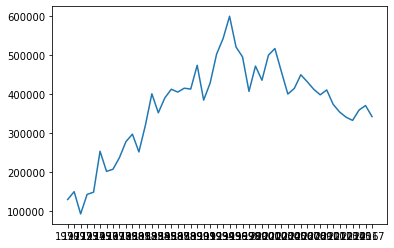

In [9]:
plt.plot(sr_one.index, sr_one.values)  # x축은 연도, y축은 인구수
                                       # matplot 사용

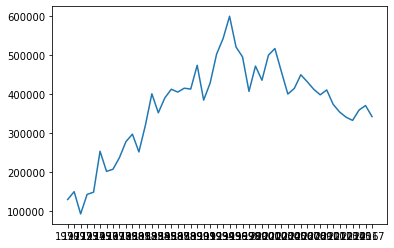

In [10]:
plt.plot(sr_one)      # 이렇게 사용해도 위와 동일(이 경우는 왼쪽이 x축)

In [11]:
# %load 한글.py                       > %load 한글(내가 만든 파일).py 에서 엔터를 누르면 
#!/usr/bin/env python                 내가 작성한 내용을 불러와 다시 엔터를 누르면 활성화가 된다.
                                         
# In[ ]:                                   # 하지만 이 파일은 내가 작업하고 있는 파일에 있어야 한다.


import matplotlib.pyplot as plt

from matplotlib import rc                  # 한글 폰트를 설정하는 명령어

rc('font', family = 'Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False



# figure, annotate

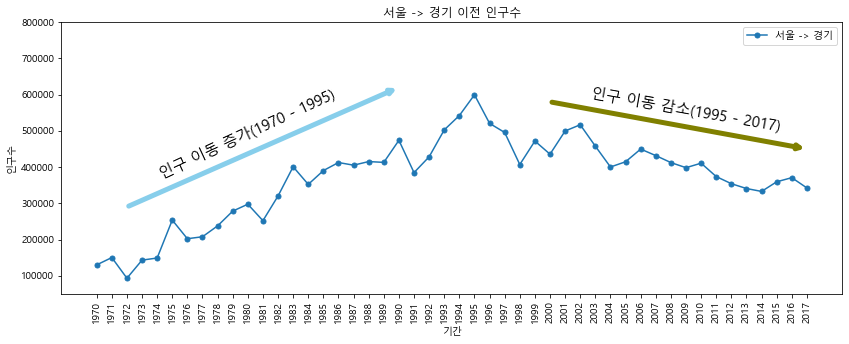

In [12]:
plt.figure(figsize = (14, 5))         # 그래프의 크기를 정하는 것. 수동으로 정하지 않으면 (10, 10)
                 # 하나의 그래프만 그리면 이렇게하지만 둘 이상의 그래프를 그릴 때는 fig로 저장한다.

plt.plot(sr_one, marker = 'o', markersize = 5)  # 어떤 자료를 가지고 그래프를 만들지, 마커 사용 여부

plt.title('서울 -> 경기 이전 인구수')               # 그래프의 이름을 선정
plt.xlabel('기간')                                  # x축의 이름 선정
plt.ylabel('인구수')                                # y축의 이름 선정

plt.legend(labels = ['서울 -> 경기'], loc = 'best')                       
                                               # 자료의 성분?을 표현 - labels로 묶어 이름 선정
                                               # best는 적당한 자리에 배열

plt.xticks(size = 10, rotation = 'vertical')   # x축 자료정보 수정

plt.ylim(50000, 800000)                            # y축 범위 설정

# 화살표(증가 혹은 감소 표현)
plt.annotate('', xy = (20, 620000), xytext = (2, 290000), xycoords = 'data',
            arrowprops = dict(arrowstyle = '->', color = 'skyblue', lw = 5))

plt.annotate('', xy = (47, 450000), xytext = (30, 580000), xycoords = 'data',
            arrowprops = dict(arrowstyle = '->', color = 'olive', lw = 5))

# plt.annotate('화살표 꼬리에 쓰는 글', xy = (시작 좌표), xytext = (끝 좌표), xycoords = 'data',
#             arrowprops = dict(arrowstyle = '->', color = 'skyblue', lw = 5))
     # 화살표 설정(딕셔너리 형태로 저장)    # ->, <-로 화살표 방향 변경    # lw = 화살표 굵기

# 주석 표시
plt.annotate('인구 이동 증가(1970 - 1995)', xy = (10, 370000), rotation = 25,
            va = 'baseline', ha = 'center', fontsize = 15)

plt.annotate('인구 이동 감소(1995 - 2017)', xy = (39, 500000), rotation = -10,
            va = 'baseline', ha = 'center', fontsize = 15)

plt.show()   

# 그래프에 관련된 설정은 무조건 같은 셀에 작성해야한다.
# 그렇지 않으면 새로운 그래프가 작성됨

### 한 페이지에 두 개의 그래프를 그림, 두 개의 행으로

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_15576/2750082187.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation = 90)    # x라벨도 set_xticklabels가 필요
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_15576/2750082187.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation = 90)


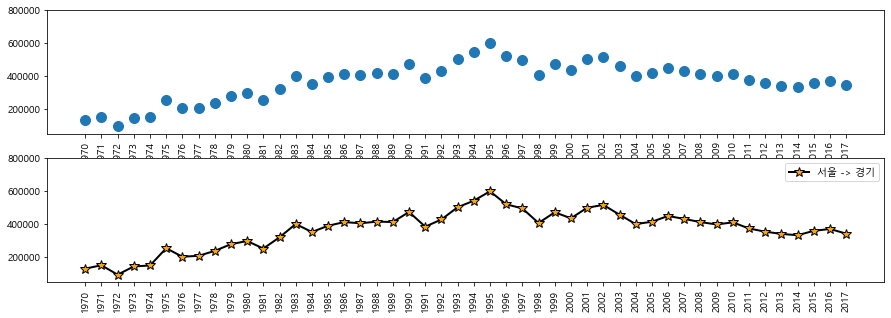

In [13]:
fig = plt.figure(figsize = (15, 5))        # 두 개의 그래프를 그린다 = 두 번 반복한다. 간단히 만들자

ax1 = fig.add_subplot(2, 1, 1)              # (2, 1, 1)  : 2행 1열로 만드는 그래프의 첫 번째
ax2 = fig.add_subplot(2, 1, 2)              # (2, 1, 2)  : 2행 1열로 만드는 그래프의 두 번째
                                                      # 두 개의 그래프 배경화면(= ax) 완성
    
# ax 각 객체에 대한 plot 정의
ax1.plot(sr_one, 'o', markersize = 10)     # plot(넣을 정보, 옵션...)
ax2.plot(sr_one, marker = '*', markersize = 10, markerfacecolor = 'orange',
        color = 'black', linewidth = 2, label = '서울 -> 경기')     # label은 이름이지만 나오진 않음
ax2.legend(loc = 'best')                                     # 대신 legend 설정을 하면 label이 나옴

# y축 범위 설정(최소값, 최대값)
ax1.set_ylim(50000, 800000)             # plt.ylim이 아닌 그래프 지정을 했기 때문에 set_ylim이 필요
ax2.set_ylim(50000, 800000)

# x축 눈금 라벨 지정 회전
ax1.set_xticklabels(sr_one.index, rotation = 90)    # x라벨도 set_xticklabels가 필요
ax2.set_xticklabels(sr_one.index, rotation = 90)

plt.show()                            # add_subplot()으로 만들어지면 무엇인가를 지정할 때 set 사용

### 하나의 캔버스에 여러 개의 그래프를 그림

In [14]:
# 서울특별시에서 충청남도, 경상북도, 강원도로 이전한 인구수의 분포도

df_two = df_seoul.loc[['충청남도', '경상북도', '강원도'], :]     # 서울에서 뽑아온다.
df_two.columns                                            # 이것이 리스트의 형태가 되어야 사용가능

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

In [15]:
col_years = list(map(str, range(1970, 2018)))      
col_years                          # 그렇기에 이런 식으로 map() 을 사용해 만들어 사용.

['1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_15576/3562518086.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation = 'vertical')


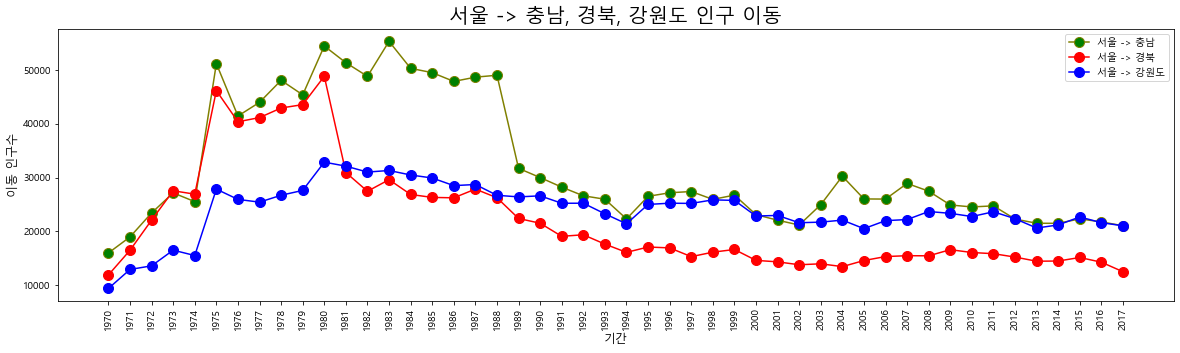

In [16]:
fig = plt.figure(figsize = (20, 5))              # 일단 여러개를 만들기 위해 간단하게 저장

ax = fig.add_subplot(1, 1, 1)                    # 하나의 그래프 배경을 만들어 놓음

# ax에 그래프를 추가
# 단일 그래프라면 ax.plot(df_two, maker = ....) 이런 식으로 들어가는데
# 하나의 그래프에 여러 내용을 추가하기 위해서는 ax.plot(x축, y축, marker=...) 이렇게 함

ax.plot(col_years, df_two.loc['충청남도', :], marker = 'o', markerfacecolor = 'green',
       markersize = 10, color = 'olive', label = '서울 -> 충남')

ax.plot(col_years, df_two.loc['경상북도', :], marker = 'o', markerfacecolor = 'red',
       markersize = 10, color = 'red', label = '서울 -> 경북')

ax.plot(col_years, df_two.loc['강원도', col_years], marker = 'o', markerfacecolor = 'blue',
       markersize = 10, color = 'blue', label = '서울 -> 강원도')

ax.legend(loc = 'best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원도 인구 이동', size = 20)          
                                      # add_subplot()으로 만들어지면 무엇인가를 지정할 때 set 사용
    
# 축 이름 추가
ax.set_ylabel('이동 인구수', size = 12)
ax.set_xlabel('기간', size = 12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation = 'vertical')

plt.show()

### 만들어진 그래프에 자료 추가하기

In [18]:
# df_two에 전라남도 데이터를 추가

df_two.loc['전라남도'] = df_seoul.loc['전라남도', col_years]
df_two.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


In [19]:
# 혹은, 이런 식으로도 사용 가능

df_two.loc['전라남도'] = df_seoul.loc['전라남도', list(df_two.columns)]
df_two.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


## 한 캔퍼스에 네 개의 그래프를 그리기

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_15576/493310965.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation = 'vertical')
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_15576/493310965.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation = 'vertical')
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_15576/493310965.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation = 'vertical')
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_15576/493310965.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation = 'vertical')


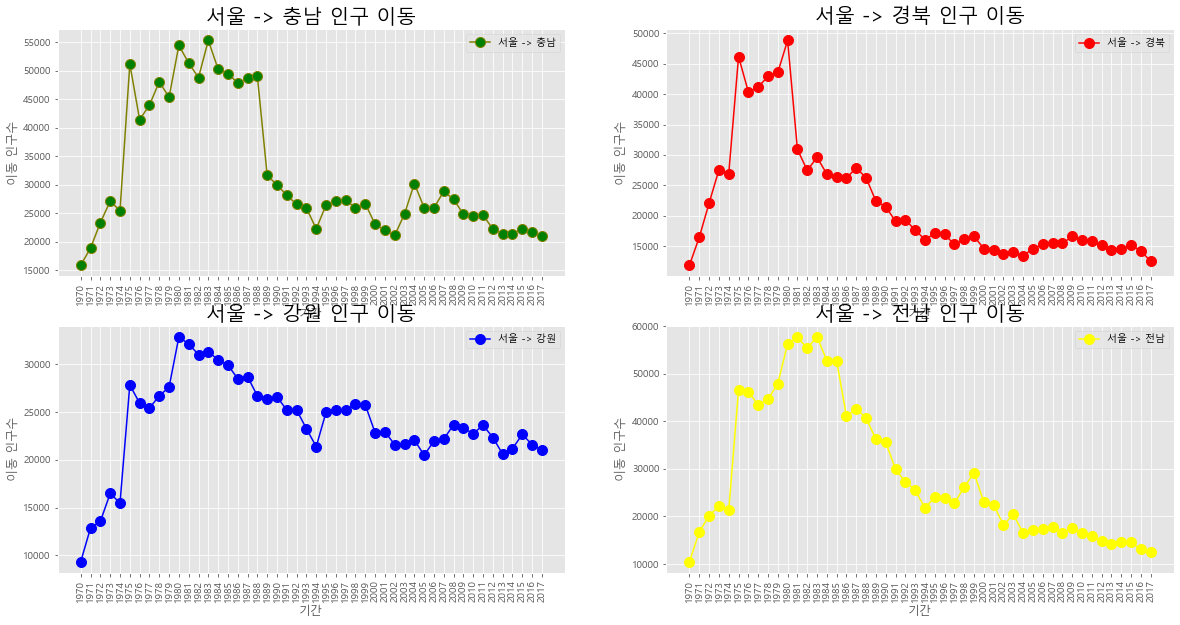

In [23]:
plt.style.use('ggplot')                        # 스타일 사용(면적)

fig = plt.figure(figsize = (20, 10))

ax1 = fig.add_subplot(2, 2, 1)                   # 2행 2열의 그래프 중 첫 번째 그래프 지정
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(col_years, df_two.loc['충청남도', :], marker = 'o', markerfacecolor = 'green',
        markersize = 10, color = 'olive', label = '서울 -> 충남')
ax2.plot(col_years, df_two.loc['경상북도', :], marker = 'o', markerfacecolor = 'red',
        markersize = 10, color = 'red', label = '서울 -> 경북')
ax3.plot(col_years, df_two.loc['강원도', :], marker = 'o', markerfacecolor = 'blue',
        markersize = 10, color = 'blue', label = '서울 -> 강원')
ax4.plot(col_years, df_two.loc['전라남도', :], marker = 'o', markerfacecolor = 'yellow',
        markersize = 10, color = 'yellow', label = '서울 -> 전남')

ax1.legend(loc = 'best')
ax2.legend(loc = 'best')
ax3.legend(loc = 'best')
ax4.legend(loc = 'best')

ax1.set_title('서울 -> 충남 인구 이동', size = 20)
ax2.set_title('서울 -> 경북 인구 이동', size = 20)
ax3.set_title('서울 -> 강원 인구 이동', size = 20)
ax4.set_title('서울 -> 전남 인구 이동', size = 20)

ax1.set_xlabel('기간', size = 12)
ax1.set_ylabel('이동 인구수', size = 12)

ax2.set_xlabel('기간', size = 12)
ax2.set_ylabel('이동 인구수', size = 12)

ax3.set_xlabel('기간', size = 12)
ax3.set_ylabel('이동 인구수', size = 12)

ax4.set_xlabel('기간', size = 12)
ax4.set_ylabel('이동 인구수', size = 12)

ax1.set_xticklabels(col_years, rotation = 'vertical')
ax2.set_xticklabels(col_years, rotation = 'vertical')
ax3.set_xticklabels(col_years, rotation = 'vertical')
ax4.set_xticklabels(col_years, rotation = 'vertical')

plt.show()

# transpose(), str -> int 바꾸는 법

In [ ]:
# df_3 = df_two.T      # df_two.transpose()  -> 행과 열의 위치를 바꿈

# df_3.index = df_3.index.map(int)   # str -> int 형으로 변경
# df_3.index

# df_3.index = map(int, df_3) 을 하여도 결과는 똑같다.

In [27]:
df_3 = df_two.T

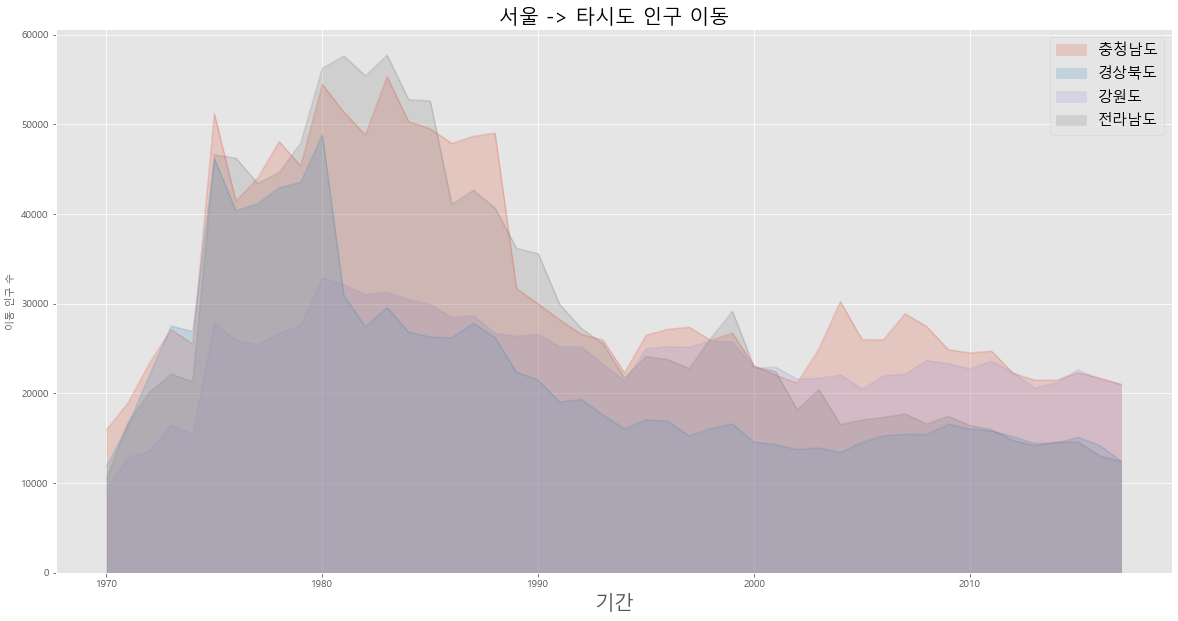

In [29]:
# 면적 그래프

plt.style.use('ggplot')

df_3.plot(kind = 'area', stacked = False, alpha = 0.2, figsize = (20, 10))  # stacked = 쌓는거
                                                                            # alpha = 투명도
plt.title('서울 -> 타시도 인구 이동', size = 20)
plt.ylabel('이동 인구 수', size = 10)
plt.xlabel('기간', size = 20)
plt.legend(fontsize = 15)

plt.show()

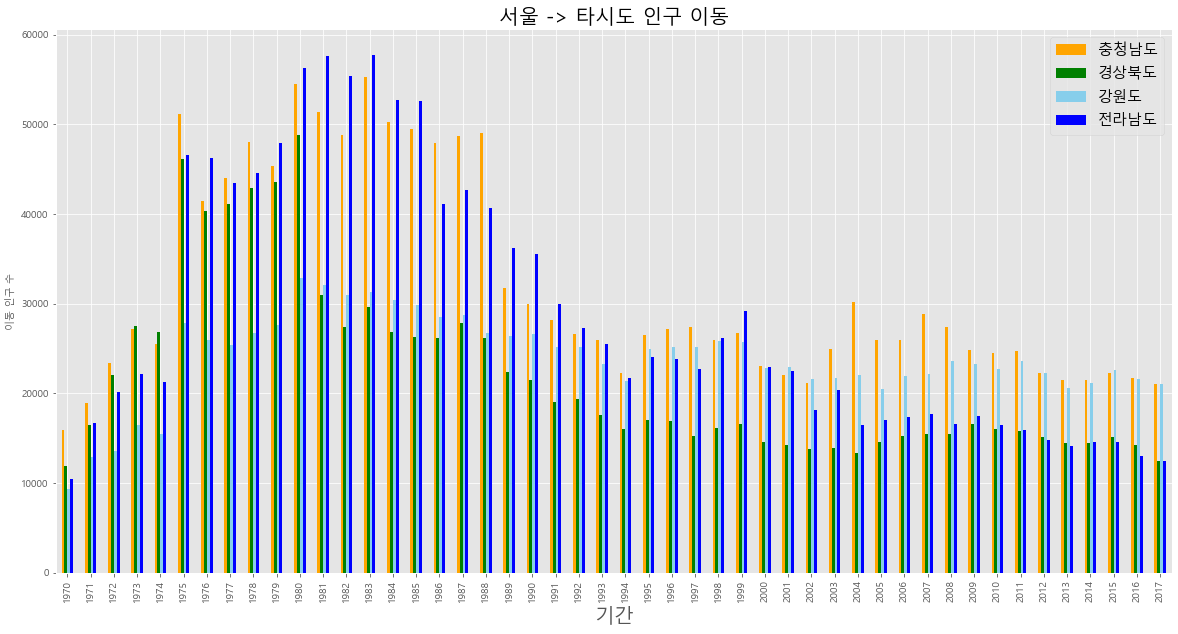

In [30]:
# 막대 그래프

plt.style.use('ggplot')

df_3.plot(kind = 'bar', color = ['orange', 'green', 'skyblue', 'blue'], figsize = (20, 10))  

plt.title('서울 -> 타시도 인구 이동', size = 20)
plt.ylabel('이동 인구 수', size = 10)
plt.xlabel('기간', size = 20)
plt.legend(fontsize = 15)

plt.show()

### 2010년도에서 2017년도까지의 충청남도, 경상남도. 강원도, 전라남도로 이동한 인구 데이터

In [31]:
col_years = list(map(str, range(2010, 2018)))

df_4 = df_seoul.loc[['충청남도', '경상남도', '강원도', '전라남도'], col_years]
df_4

,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020
경상남도,15689,16039,14474,14447,14799,15220,13717,12692
강원도,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,16429,15974,14765,14187,14591,14598,13065,12426


## 합계 : 이동인구수의 합계 - df.sum(axis = 1)

In [32]:
df_4['합계'] = df_4.sum(axis = 1)
df_4

,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020,179533.0
경상남도,15689,16039,14474,14447,14799,15220,13717,12692,117077.0
강원도,22736,23624,22332,20601,21173,22659,21590,21016,175731.0
전라남도,16429,15974,14765,14187,14591,14598,13065,12426,116035.0


## 수평 막대그래프, 도시별 인구 이동수의 합계를 그래프로 표현

In [33]:
df_total = df_4[['합계']].sort_values(by= '합계')     # 여기서는 왜 [[]]으로 쓰지?
df_total

,합계
전입지,
전라남도,116035.0
경상남도,117077.0
강원도,175731.0
충청남도,179533.0


Text(0.5, 1.0, '서울 -> 타 도시 인구 이동')

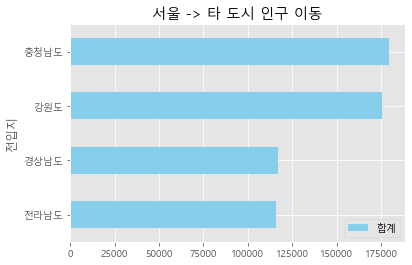

In [34]:
df_total.plot(kind = 'barh', color = 'skyblue', width = 0.5)
plt.title('서울 -> 타 도시 인구 이동')